# Import Library's 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [39]:
df=pd.read_csv("C:/Users/AKASH/Desktop/Blinkit/blinkit_data.csv")

# sample Data

In [42]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [44]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


# Gendral Analysis 

In [47]:
# Total no of columns and Rows:-
print("Total Columns and Rows are :",df.shape)

Total Columns and Rows are : (8523, 12)


In [49]:
# Columns name:-
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [51]:
# Renaming the column name

df.rename(columns={'Item Type': 'Product Type'}, inplace=True)

In [53]:
# Total Number of Products:-
print("Total Number of products are:",df["Product Type"].nunique())

Total Number of products are: 16


In [55]:
# df information ()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Product Type               8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [57]:
# Checking null values :-
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Product Type                    0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

# Cleaning

In [60]:
# Filling Null Values

# filling Null Values using the product based
product_means = df.groupby('Product Type')['Item Weight'].transform('mean')

# filling using that product mean value
df['Item Weight'] = df['Item Weight'].fillna(product_means)


In [62]:
# Checking the null values:-
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Product Type                 0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [64]:
# Checking Any Duplicates are present:-
df.duplicated().sum()

0

In [66]:
df.rename(columns={'Item Identifier': 'Product Identifier'}, inplace=True)

In [68]:
df.columns

Index(['Item Fat Content', 'Product Identifier', 'Product Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [70]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
df["Item Fat Content"] = df["Item Fat Content"].replace({"LF":"Low Fat",
                                                        "low Fat":"Low Fat",
                                                         "low fat":"Low Fat",
                                                        "reg":"Regular"})

# Business Analysis

In [75]:
# Total_sales
Total_Sales=df["Sales"].sum()

# Average Sales
avg_sales=df["Sales"].mean()

# No of item Sold
item_sold=df["Sales"].count()

# Average Rating
avg_rating=df["Rating"].mean()

# Display

print(f"Total Sales of Blinkit is : ${Total_Sales:,.0f}")

print(f"Average Sales of Blinkit is : ${avg_sales:,.0f}")

print(f"Total Item sold in  Blinkit is : {item_sold:,.0f}")

print(f"Average Rating  in  Blinkit is : {avg_rating:,.0f}")

Total Sales of Blinkit is : $1,201,681
Average Sales of Blinkit is : $141
Total Item sold in  Blinkit is : 8,523
Average Rating  in  Blinkit is : 4


In [77]:
# Product based raing
df.groupby("Product Type")["Rating"].count().sort_values(ascending=False)

Product Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Rating, dtype: int64

In [79]:
# Top Sales Products:-
df.groupby("Product Type")["Sales"].sum().sort_values(ascending=False)

Product Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

In [81]:
# Outlet Location Based Sales Analysis:
df.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)

Outlet Location Type
Tier 3    472133.0272
Tier 2    393150.6416
Tier 1    336397.8120
Name: Sales, dtype: float64

In [83]:
# Outlet Based Sales Analysis:
df.groupby(["Outlet Type","Outlet Size"])["Sales"].sum().sort_values(ascending=False)

Outlet Type        Outlet Size
Supermarket Type1  Small          362603.2536
                   High           216421.4610
                   Medium         208525.1722
Supermarket Type2  Medium         131477.7724
Supermarket Type3  Medium         130714.6746
Grocery Store      Small           82190.9148
                   Medium          37178.1092
                   High            32570.1230
Name: Sales, dtype: float64

# Chart Analysis

## Total Sales By Fat Content :-

In [87]:
fat_counts=df.groupby("Item Fat Content")["Sales"].value_counts()

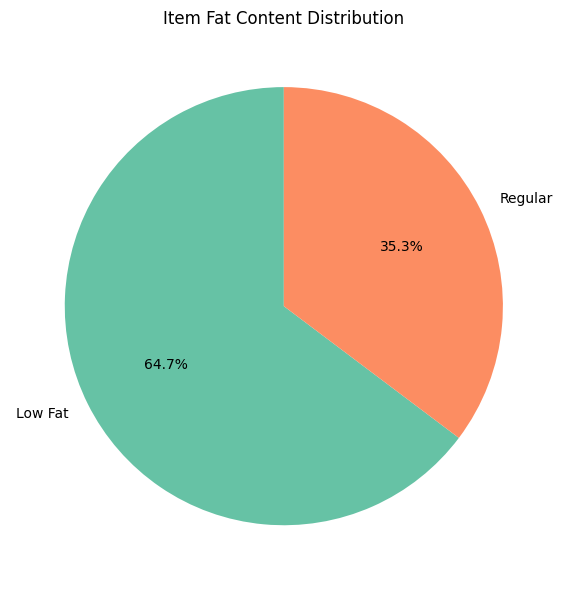

In [89]:
fat_counts = df['Item Fat Content'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fat_counts, labels=fat_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Item Fat Content Distribution')
plt.tight_layout()
plt.show()


## Sales By product type

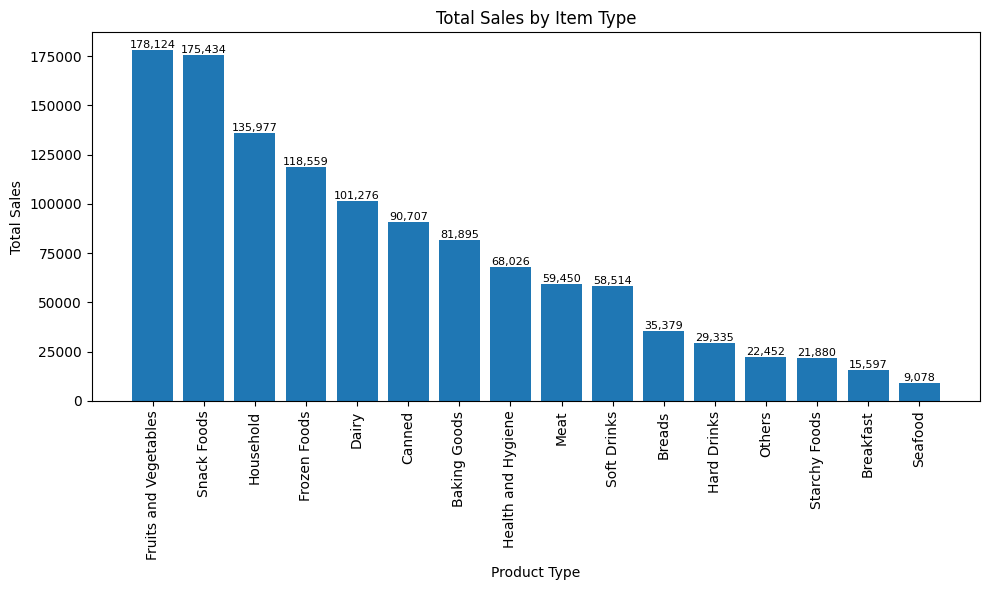

In [92]:
sales_product_type=df.groupby("Product Type")["Sales"].sum().sort_values(ascending=False)
sales_by_type = df.groupby('Product Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()


## Outlet Tier by Item Fat Content

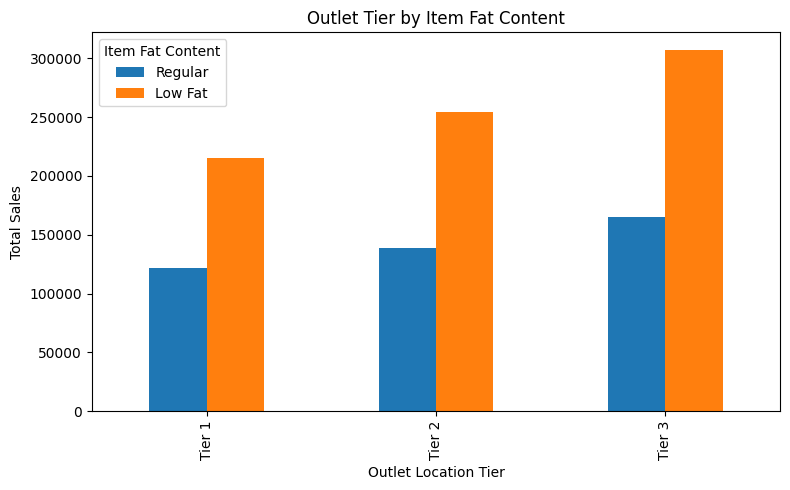

In [95]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


## Outlet Establishment

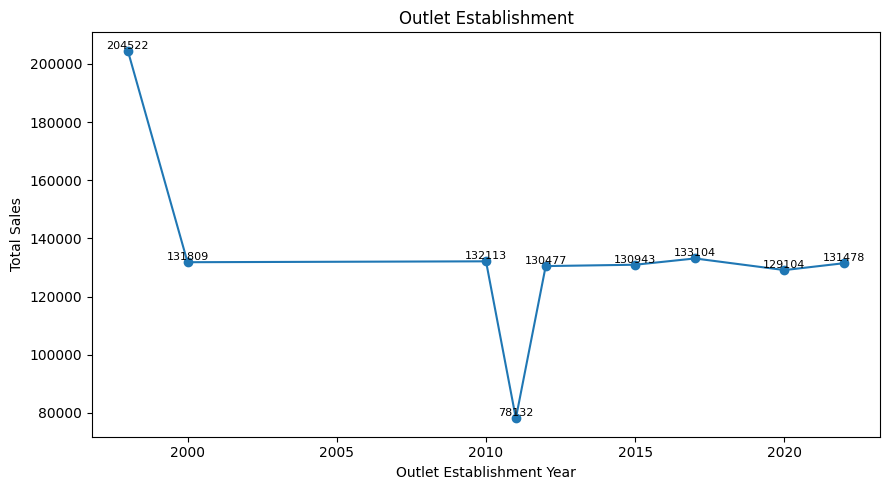

In [98]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Outlet Size

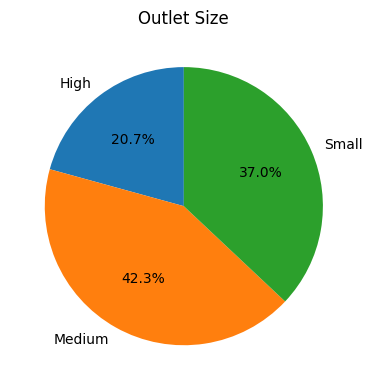

In [101]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(
    sales_by_size, 
    labels=sales_by_size.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()


## Total Sales by Outlet Location Type

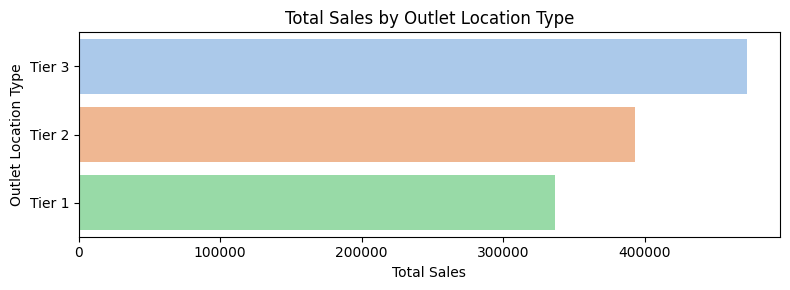

In [107]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values("Sales", ascending=False)


plt.figure(figsize=(8, 3))
ax = sns.barplot(
    x='Sales',
    y='Outlet Location Type',
    hue='Outlet Location Type',   # Add this
    data=sales_by_location,
    palette="pastel",
    legend=False                  # Optional: remove legend
)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()


## Outlet Based Analysis

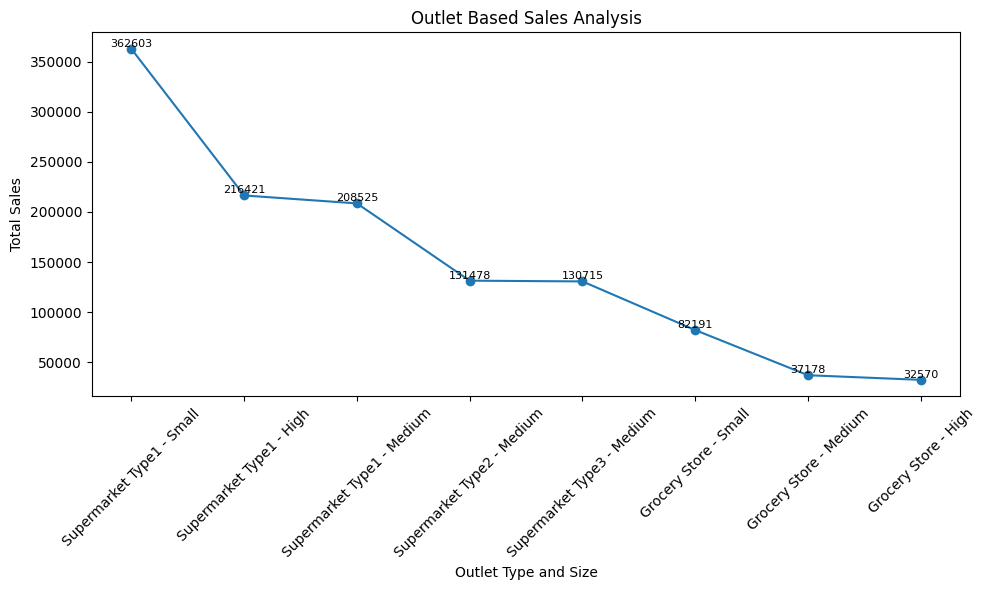

In [109]:
outlet_based_loction = df.groupby(["Outlet Type", "Outlet Size"])["Sales"].sum().sort_values(ascending=False)

# Convert MultiIndex to string for plotting
x_labels = [f'{a} - {b}' for a, b in outlet_based_loction.index]
y_values = outlet_based_loction.values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_labels, y_values, marker='o', linestyle='-')

plt.xlabel('Outlet Type and Size')
plt.ylabel('Total Sales')
plt.title('Outlet Based Sales Analysis')
plt.xticks(rotation=45)

# Add data labels
for x, y in zip(x_labels, y_values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Distribution of Item Visibility

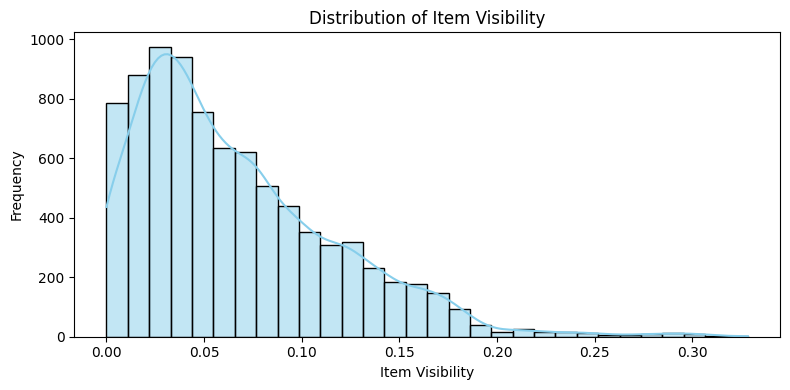

In [112]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Item Visibility'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Item Visibility vs Sales by Product Type

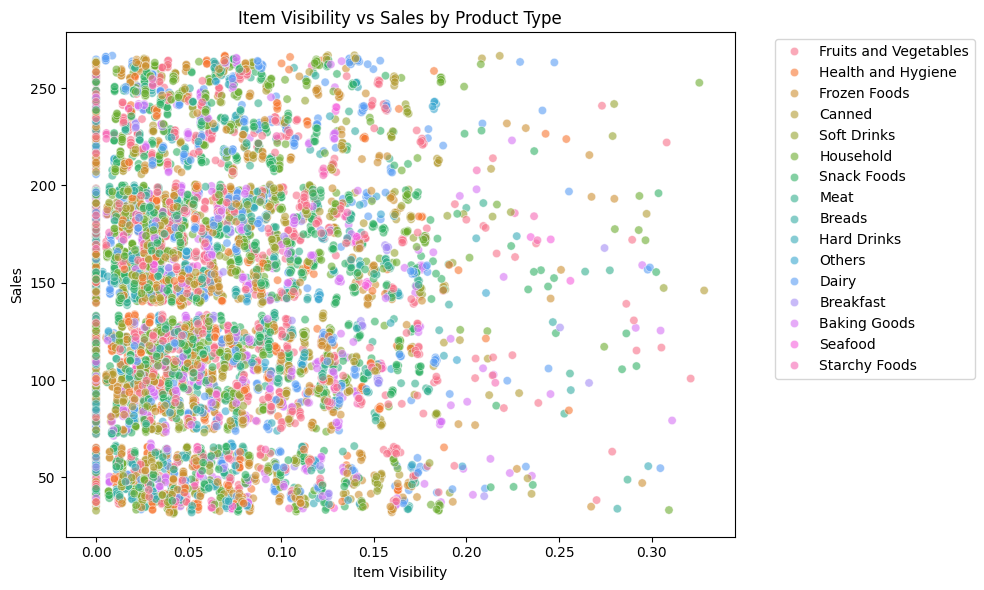

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Item Visibility', y='Sales', hue='Product Type', alpha=0.6)
plt.title('Item Visibility vs Sales by Product Type')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Product Type vs Item Fat Content

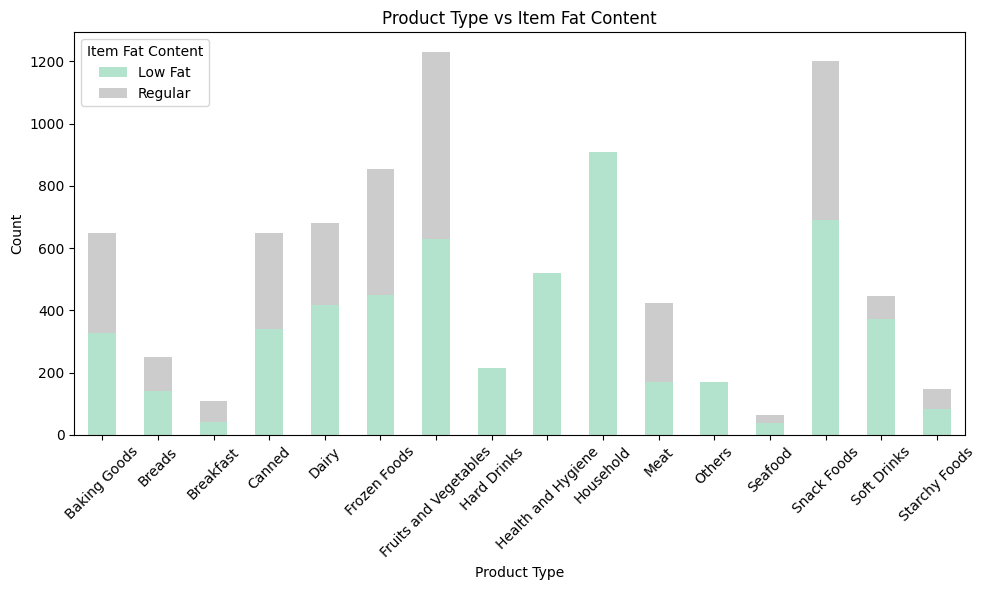

In [118]:
fat_product_ct = pd.crosstab(df['Product Type'], df['Item Fat Content'])

# Plot as stacked bar
fat_product_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel2')

plt.title('Product Type vs Item Fat Content')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()
